#  <span style="color:black">Binary Classification Tutorial - Level Intermediate</span>

**Created using:** PyCaret 3.0.0rc6 <br />
**Date Updated:** January 8, 2023

# Tutorial Objective
Welcome to the Binary Classification Tutorial - Level Intermediate. This tutorial assumes that you have completed [Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb). If you haven't used PyCaret before and this is your first tutorial, we strongly recommend you to go back and progress through the beginner tutorial to understand the basics of working in PyCaret.

In this tutorial you will learn:

* **Normalization:**  How to normalize and scale the dataset
* **Transformation:**  How to apply transformations that make the data linear and approximately normal
* **Ignore Low Variance:**  How to remove features with statistically insignificant variances to make the experiment more efficient
* **Remove Multi-collinearity:**  How to remove multi-collinearity from the dataset to boost performance of Linear algorithms
* **Group Features:**  How to extract statistical information from related features in the dataset
* **Bin Numeric Variables:**  How to bin numeric variables and transform numeric features into categorical ones using 'sturges' rule
* **Model Ensembling and Stacking:**  How to boost model performance using several ensembling techniques such as Bagging, Boosting, Soft/hard Voting and Generalized Stacking
* **Model Calibration:**  How to calibrate probabilities of a classification model
* **Experiment Logging:**  How to log experiments in PyCaret using MLFlow backend


**Read Time:** Approx. 60 Minutes <br />
**Run Time:** 10 minutes


# Install PyCaret
You can install pycaret using pip. 

`pip install pycaret`  <br />

To install the full version with all dependencies use: <br />

`pip install pycaret[full]`


# You may also be interested in:
- [Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)
- [Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)

# 2.0 Brief overview of techniques covered in this tutorial
Before we get into the practical execution of the techniques mentioned above in the Section 1, it is important to understand what these techniques are and when to use them. More often than not most of these techniques will help linear and parametric algorithms, however it is not suprising to also see performance gains in tree-based models. The below explanations are only brief and we recommend that you to do extra reading to dive deeper and get a more thorough understanding of these techniques.

- **Normalization:** Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly. For instance, in the dataset we are using for this example the `AGE` feature ranges between 21 to 79 while other numeric features range from 10,000 to 1,000,000. __[Read more](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)__ <br/>
<br/>
- **Transformation:** While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.) __[Read more](https://en.wikipedia.org/wiki/Power_transform)__<br/>
<br/>
- **Ignore Low Variance:** Datasets can sometimes contain categorical features that have a single unique or small number of values across samples. This kind of features are not only non-informative and add no value but are also sometimes harmful for few algorithms. Imagine a feature with only one unique value or few dominant unique values accross samples, they can be removed from the dataset by using the ignore low variance feature in PyCaret. <br/>
<br/>
- **Multi-collinearity:** Multi-collinearity is a state of very high intercorrelations or inter-associations among the independent features in the dataset. It is a type of disturbance in the data that is not handled well by machine learning models (mostly linear algorithms). Multi-collinearity may reduce overall coefficient of the model and cause unpredictable variance. This will lead to overfitting where the model may do great on a known training set but will fail with an unknown testing set. __[Read more](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf)__<br/>
<br/>
- **Group Features:** Sometimes datasets may contain features that are related at a sample level. For example in the `credit` dataset there are features called `BILL_AMT1 .. BILL_AMT6` which are related in such a way that `BILL_AMT1` is the amount of the bill 1 month ago and `BILL_AMT6` is the amount of the bill 6 months ago. Such features can be used to extract additional features based on the statistical properties of the distribution such as mean, median, variance, standard deviation etc. <br/>
<br/>
- **Bin Numeric Variables:** Binning or discretization is the process of transforming numerical variables into categorical features. An example would be the Age variable which is a continious distribution of numeric values that can be discretized into intervals (10-20 years, 21-30 etc.). Binning may improve the accuracy of a predictive model by reducing the noise or non-linearity in the data. PyCaret automatically determines the number and size of bins using Sturges rule.  __[Read more](https://www.vosesoftware.com/riskwiki/Sturgesrule.php)__<br/>
<br/>
- **Model Ensembling and Stacking:** Ensemble modeling is a process where multiple diverse models are created to predict an outcome. This is achieved either by using many different modeling algorithms or using different samples of training data sets. The ensemble model then aggregates the predictions of each base model resulting in one final prediction for the unseen data. The motivation for using ensemble models is to reduce the generalization error of the prediction. As long as the base models are diverse and independent, the prediction error of the model decreases when the ensemble approach is used. The two most common methods in ensemble learning are `Bagging` and `Boosting`. Stacking is also a type of ensemble learning where predictions from multiple models are used as input features for a meta model that predicts the final outcome. __[Read more](https://blog.statsbot.co/ensemble-learning-d1dcd548e936)__<br/>
<br/>

# Dataset

For this tutorial we will be using the same dataset that was used in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__

#### Dataset Acknowledgements:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ at the UCI Machine Learning Repository.

# Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ and load it using the pandas read_csv function or you can use PyCaret's data respository to load the data using the get_data function (This will require an internet connection).

In [2]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


Notice that when the `profile` parameter is to `True`, it displays a data profile for exploratory data analysis. Several pre-processing steps as discussed in section 2 above will be performed in this experiment based on this analysis. Let's summarize how the profile has helped make critical pre-processing choices with the data.

- **Missing Values:** There are no missing values in the data. However, we still need imputers in our pipeline just in case the new unseen data has missing values (not applicable in this case). When you execute the `setup()` function, imputers are created and stored in the pipeline automatically. By default, it uses a mean imputer for numeric values and a constant imputer for categorical. This can be changed using the `numeric_imputation` and `categorical_imputation` parameters in `setup()`. <br/>
<br/>
- **Multicollinearity:** There are high correlations between `BILL_AMT1 ... BIL_AMT6` which introduces multicollinearity into the data. We will remove multi-collinearity by using the `remove_multicollinearity` and `multicollinearity_threshold` parameters in setup. <br/>
<br/>
- **Data Scale / Range:** Notice how the scale / range of numeric features are different. For example the `AGE` feature ranges from between 21 to 79 and `BILL_AMT1` ranges from -165,580 to 964,511. This may cause problems for algorithms that assume all features have variance within the same order. In this case, the order of magnitude for `BILL_AMT1` is widely different than `AGE`. We will deal with this problem by using the `normalize` parameter in setup. <br/>
<br/>
- **Distribution of Feature Space:** Numeric features are not normally distributed. Look at the distributions of `LIMIT_BAL`, `BILL_AMT1` and `PAY_AMT1 ... PAY_AMT6`. A few features are also highly skewed such as `PAY_AMT1`. This may cause problems for algorithms that assume normal or approximate normal distributions of the data. Examples include Logistic Regression, Linear Discriminant Analysis (LDA) and Naive Bayes.  We will deal with this problem by using the `transformation` parameter in setup. <br/>
<br/>
- **Group Features:** From the data description we know that certain features are related with each other such as `BILL_AMT1 ... BILL_AMT6` and `PAY_AMT1 ... PAY_AMT6`. We will use the `group_features` parameter in setup to extract statistical information from these features.  <br/>
<br/>
- **Bin Numeric Features:** When looking at the correlations between the numeric features and the target variable, we see that `AGE` and `LIMIT_BAL` are weak. We will use the `bin_numeric_features` parameter to remove the noise from these variables which may help linear algorithms. <br/>

In [3]:
#check the shape of data
dataset.shape

(24000, 24)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 1200 rows has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1200 records were not available at the time when the machine learning experiment was performed.

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Setting up Environment in PyCaret

In the previous tutorial [Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) we learned how to initialize the environment in pycaret using `setup()`. No additional parameters were passed in our last example as we did not perform any pre-processing steps. In this example we will take it to the next level by customizing the pre-processing pipeline using `setup()`. Let's look at how to implement all the steps discussed in section 4 above.

In [5]:
from pycaret.classification import *

In [6]:
exp_clf102 = setup(data = data, target = 'default', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  #ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]),
                  #log_experiment = True, experiment_name = 'credit1')

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 21)"
5,Transformed train set shape,"(15959, 21)"
6,Transformed test set shape,"(6841, 21)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


Note that this is the same setup grid that was shown in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__. The only difference here is the customization parameters that were passed to `setup()` are now set to `True`. Also notice that the `session_id` is the same as the one used in the beginner tutorial, which means that the effect of randomization is completely isolated. Any improvements we see in this experiment are solely due to the pre-processing steps taken in `setup()` or any other modeling techniques used in later sections of this tutorial.

Another difference you may have noticed is the `log_experiment` and `experiment_name` parameter we have used within `setup`. This is to log all the modeling activity in this experiment. You will see at the end of this notebook on how you can benefit from this functionality.

# Compare Models

Similar to [Binary Classification Tutorial - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) we will also begin this tutorial with `compare_models()`. We will then compare the below results with the last experiment.

In [7]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8224,0.7850,0.3788,0.6760,0.4854,0.3882,0.4120,1.4410
ada,Ada Boost Classifier,0.8204,0.7805,0.3431,0.6900,0.4580,0.3646,0.3968,0.4490
lightgbm,Light Gradient Boosting Machine,0.8203,0.7817,0.3788,0.6649,0.4824,0.3834,0.4058,0.3030
rf,Random Forest Classifier,0.8140,0.7677,0.3686,0.6381,0.4668,0.3639,0.3843,0.7980
xgboost,Extreme Gradient Boosting,0.8138,0.7648,0.3725,0.6357,0.4695,0.3658,0.3852,1.2200
et,Extra Trees Classifier,0.8097,0.7542,0.3629,0.6197,0.4575,0.3516,0.3702,0.5860
lda,Linear Discriminant Analysis,0.8076,0.7492,0.2986,0.6399,0.4069,0.3098,0.3420,0.0740
lr,Logistic Regression,0.8074,0.7525,0.2720,0.6563,0.3844,0.2928,0.3329,0.9180
ridge,Ridge Classifier,0.8055,0.0000,0.2034,0.7101,0.3159,0.2415,0.3063,0.0430
knn,K Neighbors Classifier,0.7962,0.7162,0.3445,0.5646,0.4277,0.3125,0.3267,0.1540


Notice that we have used `n_select` parameter within `compare_models`. In last tutorial you have seen that `compare_models` by default returns the best performing model (single model based on default sort order). However you can use `n_select` parameter to return top N models. In this example `compare_models` has returned Top 3 models.

In [8]:
type(top3)

list

In [9]:
print(top3)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
         

For the purposes of comparison we will use the `AUC` score. Notice how drastically a few of the algorithms have improved after we performed the pre-processing in `setup()`. 
- Logistic Regression AUC improved from `0.6410` to `0.6957`
- Naives Bayes AUC improved from `0.6442` to `0.6724`
- K Nearest Neighbors AUC improved from `0.5939` to `0.6173`

To see results for all of the models from the previous tutorial refer to Section 7 in [Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb). <br/>

# Create Model

In the previous tutorial [Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) we learned how to create a model using the `create_model()` function. Now we will learn about a few other parameters that may come in handy. In this section, we will create all models using 5 fold cross validation. Notice how the `fold` parameter is passed inside `create_model()` to achieve this.

In [10]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7184,0.6063,0.3938,0.3712,0.3821,0.1999,0.2001
1,0.7296,0.6253,0.4207,0.3955,0.4077,0.2327,0.2329
2,0.7193,0.6018,0.3796,0.3691,0.3743,0.1934,0.1934
3,0.7224,0.6241,0.4320,0.3861,0.4078,0.2272,0.2279
4,0.7349,0.6213,0.4122,0.4030,0.4076,0.2368,0.2368
Mean,0.7249,0.6158,0.4076,0.3850,0.3959,0.2180,0.2182
Std,0.0064,0.0097,0.0188,0.0133,0.0146,0.0178,0.0179


In [11]:
rf = create_model('rf', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.82,0.77,0.39,0.64,0.48,0.38,0.40
1,0.81,0.77,0.36,0.64,0.46,0.36,0.38
2,0.82,0.80,0.41,0.66,0.51,0.41,0.42
3,0.81,0.74,0.36,0.63,0.46,0.35,0.38
4,0.81,0.76,0.33,0.63,0.43,0.33,0.36
5,0.81,0.78,0.35,0.64,0.45,0.35,0.38
6,0.81,0.75,0.37,0.61,0.46,0.35,0.37
7,0.82,0.78,0.37,0.67,0.48,0.38,0.41
8,0.82,0.76,0.37,0.66,0.47,0.37,0.39


Notice how passing the `round` parameter inside `create_model()` has rounded the evaluation metrics to 2 decimals.

# Tune Model

In the previous tutorial [Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) we learned how to automatically tune the hyperparameters of a model using pre-defined grids. Here we will introduce the use of the `optimize` parameter in `tune_model()` which can be thought of as an objective function. In `pycaret.classification` all hyperparameter tuning is set to optimize for `Accuracy` by default which can be changed using the `optimize` parameter. See the example below:

In [12]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.7804,0.6516,0.4694,0.5457,0.3884,0.3981
1,0.7437,0.7878,0.6657,0.4468,0.5347,0.3672,0.3811
2,0.7732,0.8113,0.7025,0.4911,0.5781,0.4296,0.4424
3,0.7519,0.7682,0.5751,0.4521,0.5062,0.3437,0.3481
4,0.7820,0.7802,0.5977,0.5060,0.5481,0.4057,0.4081
5,0.7694,0.7896,0.6629,0.4845,0.5598,0.4087,0.4179
6,0.7506,0.7472,0.5949,0.4516,0.5134,0.3500,0.3560
7,0.7569,0.7857,0.6572,0.4649,0.5446,0.3854,0.3961
8,0.7437,0.7564,0.6147,0.4429,0.5148,0.3469,0.3555


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
1,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
2,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
3,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
4,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
5,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
6,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
7,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000
8,0.2212,0.5000,1.0000,0.2212,0.3622,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Notice how the results of tuning Random Forest Classifiers differ with the `optimize` param. In `tuned_rf` we optimized `AUC` resulting in `0.7691` in `AUC` and `0.6446` in `Recall`. However, in `tuned_rf2` when we set the `optimize` parameter to `Recall`, it actually resulted in a better model in terms of `Recall`. However, `AUC` was compromised. Observe the differences between the hyperparameters of `tuned_rf` and `tuned_rf2` below:

In [14]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,6
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_samples_leaf,6


In [15]:
plot_model(tuned_rf2, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced
criterion,gini
max_depth,2
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_samples_leaf,3


# Ensemble Model

Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting [(Read More)](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205). We will use the `ensemble_model()` function in PyCaret which ensembles the trained base estimators using the method defined in the `method` parameter.

In [16]:
# lets create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7199,0.6090,0.4023,0.3757,0.3885,0.2072,0.2074
1,0.7400,0.6327,0.4221,0.4139,0.4180,0.2506,0.2506
2,0.7293,0.6262,0.4249,0.3958,0.4098,0.2345,0.2348
3,0.7393,0.6303,0.4193,0.4123,0.4157,0.2480,0.2480
4,0.7375,0.6161,0.3881,0.4029,0.3954,0.2278,0.2279
5,0.7143,0.5972,0.3768,0.3604,0.3684,0.1839,0.1840
6,0.7268,0.6293,0.4249,0.3916,0.4076,0.2305,0.2308
7,0.7375,0.6329,0.4334,0.4113,0.4221,0.2524,0.2525
8,0.7500,0.6401,0.4334,0.4347,0.4340,0.2736,0.2736


In [17]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8070,0.7405,0.3853,0.5991,0.4690,0.3578,0.3708
1,0.8008,0.7338,0.3484,0.5829,0.4362,0.3244,0.3402
2,0.8102,0.7668,0.3824,0.6136,0.4712,0.3630,0.3781
3,0.8045,0.7116,0.3371,0.6041,0.4327,0.3259,0.3462
4,0.8076,0.7229,0.3229,0.6264,0.4262,0.3245,0.3503
5,0.7989,0.7144,0.3229,0.5816,0.4153,0.3056,0.3250
6,0.7976,0.7072,0.3513,0.5688,0.4343,0.3194,0.3331
7,0.8133,0.7461,0.3428,0.6471,0.4481,0.3483,0.3738
8,0.8114,0.7342,0.3796,0.6204,0.4710,0.3642,0.3805


In [18]:
# check the parameters of bagged_dt
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        random_state=123,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
        

Notice how ensembling has improved the `AUC` of Decision Tree Classifier. In the above example we have used the default parameters of `ensemble_model()` which uses the `Bagging` method. Let's try `Boosting` by changing the `method` parameter in `ensemble_model()`. See example below: 

In [19]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7932,0.7089,0.3683,0.5485,0.4407,0.3198,0.3294
1,0.7456,0.6970,0.3966,0.4204,0.4082,0.2463,0.2465
2,0.7776,0.7610,0.3541,0.4960,0.4132,0.2807,0.2868
3,0.7820,0.7207,0.3456,0.5105,0.4122,0.2844,0.2925
4,0.7657,0.6828,0.3314,0.4588,0.3849,0.2447,0.2497
5,0.7857,0.6937,0.3456,0.5236,0.4164,0.2918,0.3013
6,0.7901,0.7134,0.3088,0.5450,0.3942,0.2788,0.2953
7,0.7895,0.7162,0.3343,0.5388,0.4126,0.2928,0.3052
8,0.7726,0.6747,0.3938,0.4826,0.4337,0.2932,0.2956


Notice how easy it is to ensemble models in PyCaret. By simply changing the `method` parameter you can do bagging or boosting which would otherwise have taken multiple lines of code. Note that `ensemble_model()` will by default build `10` estimators. This can be changed using the `n_estimators` parameter. Increasing the number of estimators can sometimes improve results. See an example below:

In [20]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7575,0.3966,0.6222,0.4844,0.3772,0.3914
1,0.8139,0.7603,0.3796,0.6321,0.4743,0.3697,0.3875
2,0.8114,0.7890,0.4023,0.6121,0.4855,0.3760,0.3884
3,0.8127,0.7367,0.3881,0.6227,0.4782,0.3714,0.3869
4,0.8145,0.7463,0.3598,0.6447,0.4618,0.3605,0.3829
5,0.8127,0.7631,0.3569,0.6364,0.4574,0.3548,0.3765
6,0.8051,0.7400,0.3654,0.5972,0.4534,0.3431,0.3585
7,0.8258,0.7668,0.3683,0.7027,0.4833,0.3906,0.4201
8,0.8170,0.7555,0.3881,0.6432,0.4841,0.3811,0.3990


Notice how increasing the n_estimators parameter has improved the performance of ensembled model. The bagged_dt model with the default `10` estimators resulted in an AUC of `0.7282` whereas in bagged_dt2 where `n_estimators = 50` the AUC improved to `0.7503`.

# Blend Models

Blending is another common technique for ensembling that can be used in PyCaret. It uses predictions from multiple models to generate a final set of predictions using voting / majority consensus from all of the models passed in the `estimator_list` parameter. The `method` parameter can be used to define the type of voting. When set to `hard`, it uses labels for majority rule voting. When set to `soft` it uses the sum of predicted probabilities instead of the label. Default value of method is set to `auto` which means it tries to use `soft` method and fall back to `hard` if the former is not supported. Let's see an example below:

In [21]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

In [22]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7964,0.7526,0.3569,0.5625,0.4367,0.3200,0.3323
1,0.8014,0.7708,0.3626,0.5818,0.4468,0.3336,0.3474
2,0.8039,0.7764,0.3683,0.5909,0.4538,0.3420,0.3562
3,0.8020,0.7487,0.3768,0.5808,0.4570,0.3426,0.3546
4,0.8095,0.7475,0.3513,0.6231,0.4493,0.3448,0.3655
5,0.7964,0.7474,0.3399,0.5660,0.4248,0.3103,0.3252
6,0.7870,0.7375,0.3484,0.5279,0.4198,0.2960,0.3055
7,0.8033,0.7679,0.3598,0.5907,0.4472,0.3360,0.3513
8,0.8051,0.7447,0.3626,0.5981,0.4515,0.3416,0.3574


In [23]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8195,0.0000,0.3626,0.6702,0.4706,0.3732,0.3989
1,0.8221,0.0000,0.3456,0.6971,0.4621,0.3697,0.4024
2,0.8177,0.0000,0.3541,0.6649,0.4621,0.3644,0.3907
3,0.8158,0.0000,0.3399,0.6630,0.4494,0.3523,0.3807
4,0.8127,0.0000,0.3116,0.6627,0.4239,0.3289,0.3624
5,0.8158,0.0000,0.3399,0.6630,0.4494,0.3523,0.3807
6,0.8152,0.0000,0.3484,0.6543,0.4547,0.3557,0.3813
7,0.8189,0.0000,0.3314,0.6882,0.4474,0.3546,0.3885
8,0.8170,0.0000,0.3513,0.6631,0.4593,0.3614,0.3879


In [24]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8195,0.7925,0.3824,0.6585,0.4839,0.3837,0.4045
1,0.8264,0.7930,0.3796,0.6979,0.4917,0.3979,0.4248
2,0.8208,0.8191,0.3881,0.6618,0.4893,0.3895,0.4099
3,0.8183,0.7749,0.3739,0.6567,0.4765,0.3765,0.3983
4,0.8246,0.7824,0.3683,0.6952,0.4815,0.3877,0.4161
5,0.8208,0.7936,0.3796,0.6667,0.4838,0.3851,0.4074
6,0.8164,0.7554,0.3654,0.6515,0.4682,0.3677,0.3902
7,0.8308,0.7978,0.3909,0.7150,0.5055,0.4138,0.4413
8,0.8221,0.7626,0.3711,0.6788,0.4799,0.3834,0.4089


In [25]:
print(blender_top3.estimators_)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
         

# Stack Models

Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of `stack_models()` is based on Wolpert, D. H. (1992b). Stacked generalization [(Read More)](https://www.sciencedirect.com/science/article/abs/pii/S0893608005800231). 

Let's see an example below using the top 3 models we have obtained from `compare_models`:

In [26]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8202,0.7891,0.3796,0.6634,0.4829,0.3836,0.4056
1,0.8252,0.7903,0.3739,0.6947,0.4862,0.3921,0.4194
2,0.8246,0.8193,0.3938,0.6780,0.4982,0.4008,0.4226
3,0.8139,0.7783,0.3541,0.6443,0.4570,0.3560,0.3793
4,0.8227,0.7796,0.3683,0.6842,0.4788,0.3834,0.4101
5,0.8233,0.7987,0.3853,0.6766,0.4910,0.3937,0.4165
6,0.8139,0.7543,0.3654,0.6386,0.4649,0.3622,0.3829
7,0.8315,0.7968,0.3966,0.7143,0.5100,0.4181,0.4445
8,0.8252,0.7529,0.3796,0.6907,0.4899,0.3950,0.4208


In [27]:
xgboost = create_model('xgboost')
stack_soft2 = stack_models(top3, meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8145,0.7586,0.3909,0.6301,0.4825,0.3770,0.3930
1,0.8139,0.7713,0.3598,0.6414,0.4610,0.3591,0.3811
2,0.8158,0.7994,0.3938,0.6347,0.4860,0.3812,0.3973
3,0.8177,0.7459,0.3768,0.6520,0.4776,0.3766,0.3973
4,0.8145,0.7579,0.3541,0.6477,0.4579,0.3574,0.3811
5,0.8152,0.7679,0.3768,0.6394,0.4742,0.3710,0.3901
6,0.8014,0.7507,0.3598,0.5826,0.4448,0.3320,0.3463
7,0.8239,0.7840,0.3909,0.6765,0.4955,0.3980,0.4199
8,0.8139,0.7372,0.3484,0.6474,0.4530,0.3529,0.3775


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.7544,0.3966,0.6422,0.4904,0.3868,0.4035
1,0.8083,0.7766,0.3569,0.6146,0.4516,0.3452,0.3639
2,0.8102,0.7824,0.3796,0.6147,0.4694,0.3615,0.3771
3,0.8127,0.7484,0.3739,0.6286,0.4689,0.3640,0.3821
4,0.8114,0.7563,0.3456,0.6354,0.4477,0.3457,0.3691
5,0.8070,0.7685,0.3541,0.6098,0.4480,0.3409,0.3594
6,0.8020,0.7377,0.3541,0.5869,0.4417,0.3302,0.3458
7,0.8271,0.7823,0.4136,0.6791,0.5141,0.4164,0.4353
8,0.8221,0.7376,0.3796,0.6734,0.4855,0.3879,0.4112


Selecting which `method` and `models` to use in stacking depends on the statistical properties of the dataset. Experimenting with different models and methods is the best way to find out which configuration will work best. However as a general rule of thumb, models with strong yet diverse performance tend to improve results when used in stacking. </br>

Before we wrap up this section, there is another parameter in `stack_models()` that we haven't seen yet called `restack`. This parameter controls the ability to expose the raw data to the meta model. When set to `True`, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to `True`.

# Calibrate Model

When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the `calibrate_model()` function. See an example below:

In [28]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.7702,0.3909,0.6359,0.4842,0.3798,0.3964
1,0.8133,0.7676,0.3598,0.6382,0.4601,0.3577,0.3792
2,0.8233,0.7998,0.4136,0.6606,0.5087,0.4079,0.4245
3,0.8120,0.7430,0.3598,0.6318,0.4585,0.3550,0.3756
4,0.8089,0.7607,0.3258,0.6319,0.4299,0.3289,0.3550
5,0.8133,0.7765,0.3513,0.6425,0.4542,0.3531,0.3765
6,0.8076,0.7496,0.3654,0.6085,0.4566,0.3485,0.3652
7,0.8208,0.7816,0.3739,0.6701,0.4800,0.3821,0.4058
8,0.8177,0.7573,0.3654,0.6582,0.4699,0.3705,0.3939


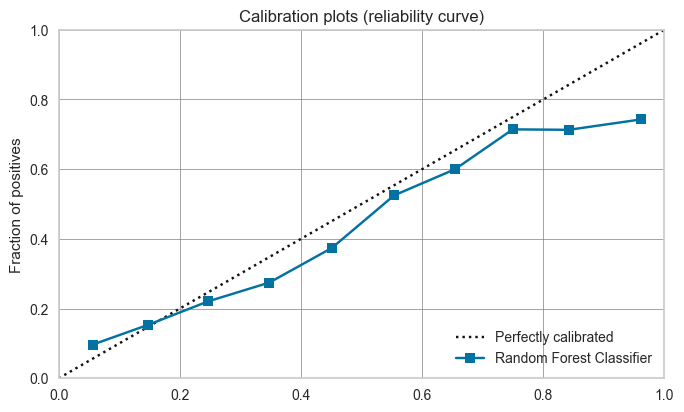

In [29]:
plot_model(rf, plot='calibration')

In [30]:
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7760,0.3626,0.6882,0.4750,0.3804,0.4087
1,0.8139,0.7777,0.3201,0.6647,0.4321,0.3368,0.3690
2,0.8164,0.8033,0.3626,0.6531,0.4663,0.3662,0.3894
3,0.8133,0.7541,0.3286,0.6554,0.4377,0.3403,0.3695
4,0.8127,0.7639,0.3144,0.6607,0.4261,0.3306,0.3632
5,0.8145,0.7804,0.3116,0.6748,0.4264,0.3332,0.3687
6,0.8152,0.7477,0.3399,0.6593,0.4486,0.3509,0.3788
7,0.8233,0.7904,0.3286,0.7205,0.4514,0.3631,0.4030
8,0.8158,0.7609,0.3173,0.6788,0.4324,0.3393,0.3744


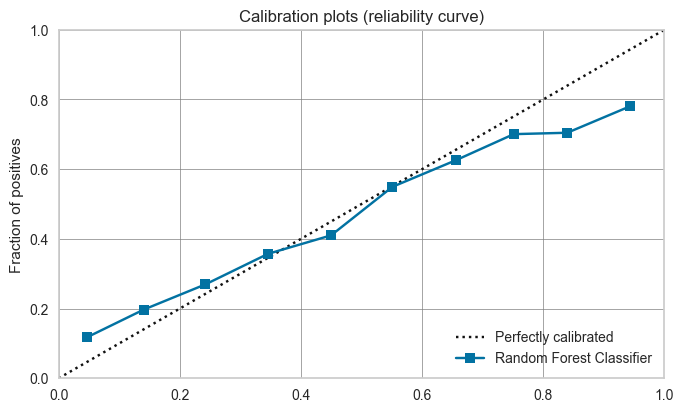

In [31]:
plot_model(calibrated_rf, plot='calibration')

Notice how different the above 2 plots look. One is before calibration and one is after. A perfectly calibrated classifier will follow the black dotted line in the above plots. Not only is `calibrated_rf` better calibrated but the `AUC` has also improved from `0.7591` to `0.7646`. By default, `calibrate_model()` uses the `sigmoid` method which corresponds to Platt's approach. The other available method is `isotonic` which is a non-parametric approach. See an example of calibration using the `isotonic` method below:  

In [32]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8221,0.7758,0.3711,0.6788,0.4799,0.3834,0.4089
1,0.8177,0.7755,0.3569,0.6632,0.4641,0.3659,0.3915
2,0.8202,0.8019,0.4023,0.6514,0.4974,0.3952,0.4123
3,0.8139,0.7529,0.3428,0.6505,0.4490,0.3497,0.3757
4,0.8114,0.7656,0.3371,0.6398,0.4416,0.3410,0.3663
5,0.8164,0.7807,0.3371,0.6685,0.4482,0.3521,0.3819
6,0.8102,0.7477,0.3569,0.6238,0.4541,0.3493,0.3692
7,0.8264,0.7893,0.3683,0.7065,0.4842,0.3920,0.4221
8,0.8164,0.7590,0.3484,0.6613,0.4564,0.3585,0.3851


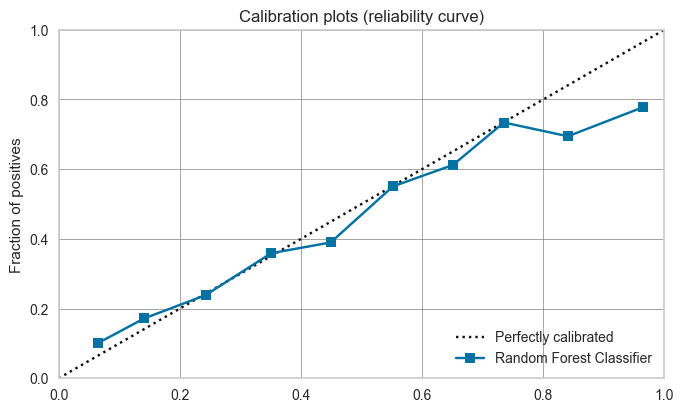

In [33]:
plot_model(calibrated_rf_isotonic, plot='calibration')

# Experiment Logging

PyCaret >= 2.0 embeds MLflow Tracking component as a backend API and UI for logging parameters, code versions, metrics, and output files when running your machine learning code and for later visualizing the results. To log your experiments in pycaret simply use `log_experiment` and `experiment_name` parameter in the `setup` function, as we did in this example.

You can start the UI on `https://localhost:5000`. Simply initiate the MLFlow server from command line or from notebook. See example below:

In [34]:
# to start the MLFlow server from notebook:
# !mlflow ui 

### Open localhost:5000 on your browser (below is example of how UI looks like)
![title](https://i2.wp.com/pycaret.org/wp-content/uploads/2020/07/classification_mlflow_ui.png?resize=1080%2C508&ssl=1)

# Wrap-up / Next Steps?

We have covered a lot of new concepts in this tutorial. Most importantly we have seen how to use exploratory data analysis to customize a pipeline in `setup()` which has improved the results considerably when compared to what we saw earlier in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__. We have also learned how to perform and tune ensembling in PyCaret.

There are however a few more advanced things to cover in `pycaret.classification` which include defining and optimizing custom cost functions, interpreting more complex tree based models using shapley values, advanced ensembling techniques such as multiple layer stacknet and more pre-processing pipeline methods. We will cover all of this in our next and final tutorial in the `pycaret.classification` series. 

See you at the next tutorial. Follow the link to __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__